### batch_data_uniform

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV File
filename = "batch_data_uniform.csv"
data = pd.read_csv(filename)


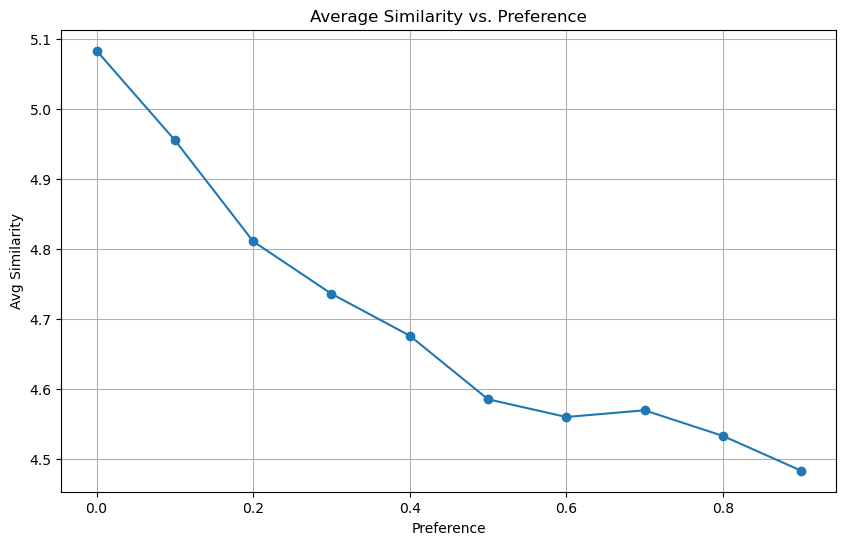

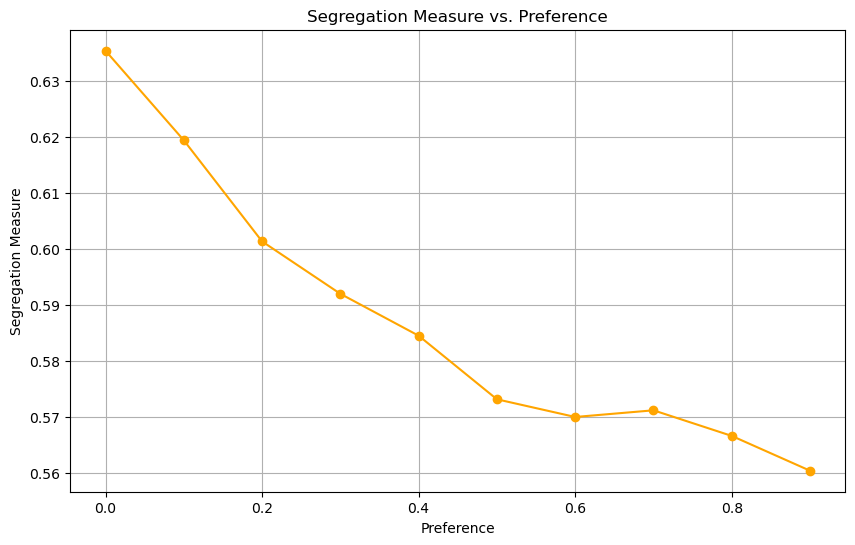

In [14]:
# Filter data for the largest step at each iteration
max_step_data = data.groupby('iteration').apply(lambda x: x[x['Step'] == x['Step'].max()])

# Calculate segregation for each iteration
avg_similarity = max_step_data.groupby('preference')['Number of Similar Neighbors'].mean()
segregation_measure = max_step_data.groupby('preference')['Number of Similar Neighbors'].mean() / 8

# Plot Avg Similarity vs. Preference
plt.figure(figsize=(10, 6))
plt.plot(avg_similarity.index, avg_similarity.values, marker='o')
plt.xlabel('Preference')
plt.ylabel('Avg Similarity')
plt.title('Average Similarity vs. Preference')
plt.grid(True)
plt.show()

# Plot Segregation vs. Preference
plt.figure(figsize=(10, 6))
plt.plot(segregation_measure.index, segregation_measure.values, marker='o', color='orange')
plt.xlabel('Preference')
plt.ylabel('Segregation Measure')
plt.title('Segregation Measure vs. Preference')
plt.grid(True)
plt.show()


### batch_data_beta_tolerance_changes

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data from the CSV file
data = pd.read_csv("batch_data_beta_tolerance_changes.csv")

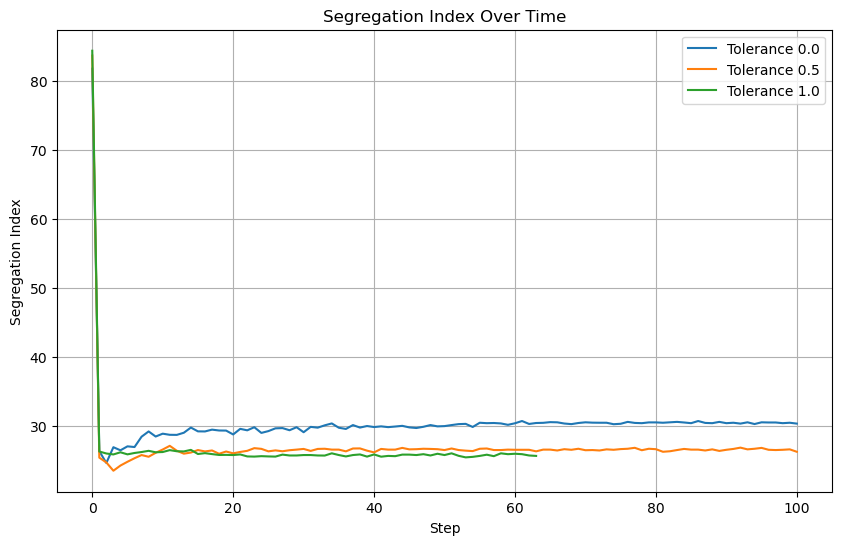

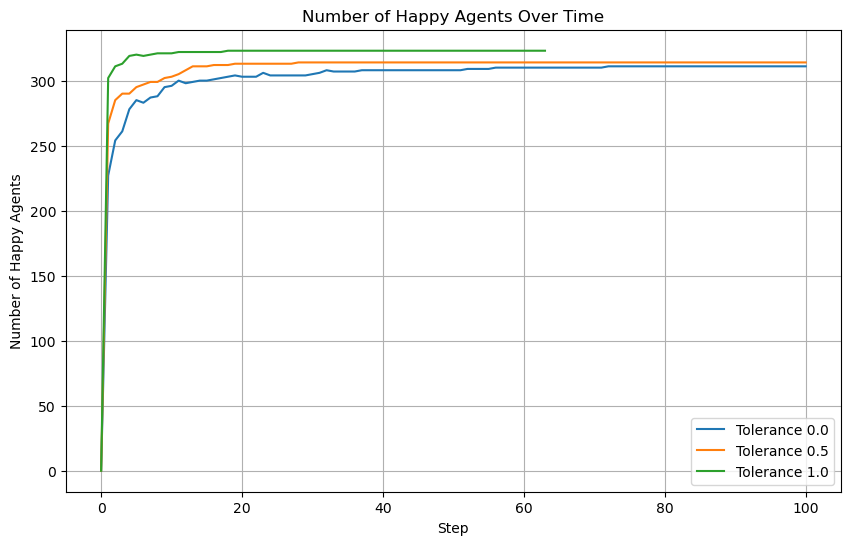

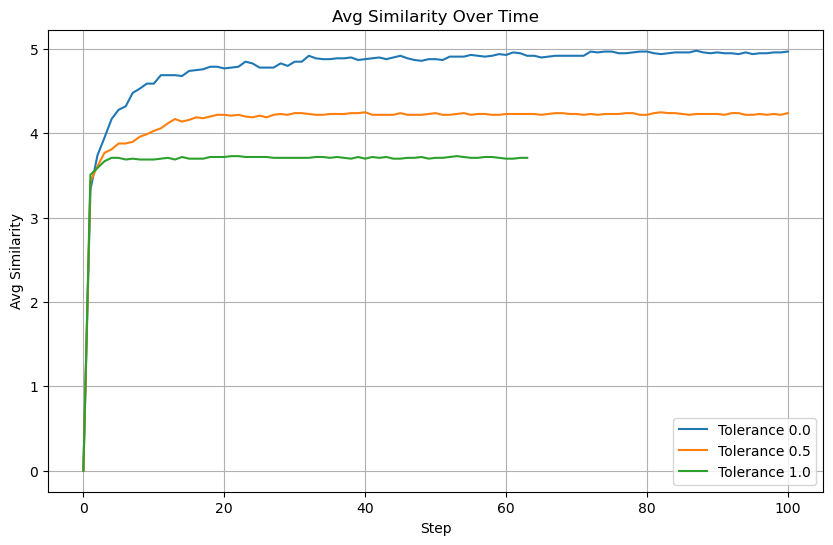

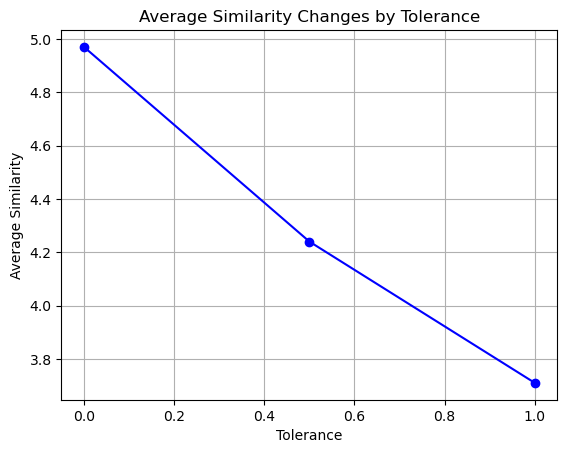

In [53]:
def compute_dissimilarity_index(df, minority_pc):
    """Compute D given a snapshot of the data"""
    dis = 0
    agent_list = snapshot_data['AgentID']
    for index, row in snapshot_data.iterrows():
        agent_type = row['Agent type']
        similar = row['Similar Neighbors in This Neighborhood']
        if agent_type == 1:
            pi = similar/num_neighbors
        elif agent_type == 0:
            pi = 1 - similar/num_neighbors
        dis += np.abs(minority_pc - pi)
    
    dis = 0.5*dis
    return dis

num_neighbors = 8
minority_pc = data['minority_pc'].iloc[0]

runid_list = data[['RunId']].drop_duplicates()['RunId'].tolist()
iter_list = data[['iteration']].drop_duplicates()['iteration'].tolist()

# this code only works when iteration times = 1 !!!!!!
dis_dct = {} # lists of dis indexes given tolerance
happy_dct = {}
avg_similarity_by_time = {}
avg_similarity_by_tolearnce = {}
for run_id in runid_list:
    for iter_id in iter_list:
        # each iteration with tolerance value being held
        filtered_data = data.loc[(data['RunId'] == run_id) & (data['iteration'] == iter_id)]
        tolerance_value = filtered_data.iloc[0]['tolerance']
        step_list = filtered_data[['Step']].drop_duplicates()['Step'].tolist()
        dis_dct[tolerance_value] = [] # dis index along steps
        happy_dct[tolerance_value] = [] # num of happy agents along steps
        avg_similarity_by_time[tolerance_value] = []

        for step_id in step_list:
            snapshot_data = filtered_data.loc[filtered_data['Step'] == step_id]
            dis = compute_dissimilarity_index(snapshot_data, minority_pc)
            dis_dct[tolerance_value].append(dis)
            num_happy = snapshot_data.iloc[0]['happy']
            happy_dct[tolerance_value].append(num_happy)
            avg_similarity = snapshot_data.iloc[0]['Avg Similarity']
            avg_similarity_by_time[tolerance_value].append(avg_similarity)
            if step_id == max(step_list):
                avg_similarity_by_tolearnce[tolerance_value] = avg_similarity

        
# Plot 1
plt.figure(figsize=(10, 6))
for tolerance, dis_values in dis_dct.items():
    plt.plot(dis_values, label=f"Tolerance {tolerance}")

plt.title('Segregation Index Over Time')
plt.xlabel('Step')
plt.ylabel('Segregation Index')
plt.legend()
plt.grid(True)
plt.show()

# Plot 2
plt.figure(figsize=(10, 6))
for tolerance, happy in happy_dct.items():
    plt.plot(happy, label=f"Tolerance {tolerance}")

plt.title('Number of Happy Agents Over Time')
plt.xlabel('Step')
plt.ylabel('Number of Happy Agents')
plt.legend()
plt.grid(True)
plt.show()

# Plot 3
plt.figure(figsize=(10, 6))
for tolerance, avg_similarity in avg_similarity_by_time.items():
    plt.plot(avg_similarity, label=f"Tolerance {tolerance}")

plt.title('Avg Similarity Over Time')
plt.xlabel('Step')
plt.ylabel('Avg Similarity')
plt.legend()
plt.grid(True)
plt.show()

# Plot 4
tolerance = list(avg_similarity_by_tolearnce.keys())
avg_similarity = list(avg_similarity_by_tolearnce.values())
plt.plot(tolerance, avg_similarity, marker='o', color='b', linestyle='-')
plt.title('Average Similarity Changes by Tolerance')
plt.xlabel('Tolerance')
plt.ylabel('Average Similarity')
plt.grid(True)
plt.show()